In [10]:
!pip install scikit-learn


In [15]:
conda install scikit-learn

from sklearn.preprocessing import data


SyntaxError: invalid syntax (Temp/ipykernel_4620/1425926003.py, line 1)

In [2]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
#from sklearn.preprocessing import Imputer


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

ModuleNotFoundError: No module named 'sklearn.preprocessing.data'

In [2]:
# Kaggle Competition | Titanic Machine Learning from Disaster

# The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. 
# On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, 
# killing 1502 out of 2224 passengers and crew. 

# This sensational tragedy shocked the international community and led to better safety 
# regulations for ships.

# One of the reasons that the shipwreck led to such loss of life was that there were not enough 
# lifeboats for the passengers and crew. 
# Although there was some element of luck involved in surviving the sinking, 
# some groups of people were more likely to survive than others, such as women, children, and 
# the upper-class.
# Among passenger who survived, the fare ticket mean is 100$. It falls to 50$ in the subset of 
# people who did not survive. Now, let’s say you have a new passenger. You do not know if he 
# survived or not but you know he bought a 30$ ticket to cross the Atlantic. 

# What is your prediction of survival for this passenger?

In [3]:
# Survived - Survival (0 = No; 1 = Yes)
# Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# Name - Name
# Sex - Sex
# Age - Age
# SibSp - Number of Siblings/Spouses Aboard
# Parch - Number of Parents/Children Aboard
# Ticket - Ticket Number
# Fare - Passenger Fare (British pound)
# Cabin - Cabin
# Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [21]:
location = pd.read_csv(r"C:\Users\shubh\symbiosis ml16\datasets\titanic-train.csv")

In [22]:
location


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
# load the training data from titanic data set
location.shape

(891, 12)

In [24]:
# load the training data from titanic data set
df_train = location
df_train.shape

(891, 12)

In [25]:
url = 'https://raw.githubusercontent.com//BigDataGal//Python-for-Data-Science//master//titanic-train.csv'
titanic = pd.read_csv(url)

titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.shape

(891, 12)

In [26]:
# see distinct values in the survived column
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [27]:
# see distinct values in the Sex column
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
# see distinct values in the Embarked column
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
# Checking for missing values
# It's easy to check for missing values by calling the isnull() method, and 
# the sum() method off of that, to return a tally of all the True values that are returned 
# by the isnull() method.

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df_train.shape

(891, 12)

In [31]:
# there are only 891 rows in the titanic data frame. Cabin is almost all missing values, 
# so we can drop that variable completely, 

# but what about age? 
# Age seems like a relevant predictor for survival right? We'd want to keep the variables, 
# but it has 177 missing values.  

# Need to find a way to approximate for those missing values!

In [32]:
# drop all the variables that aren't relevant for predicting survival. 
# We should at least keep the following:

# Survived - This variable is obviously relevant.
# Pclass   - Does a passenger's class on the boat affect their survivability?
# Sex      - Could a passenger's gender impact their survival rate?
# Age      - Does a person's age impact their survival rate?
# SibSp    - Does the number of relatives on the boat (that are siblings or a spouse) 
#            affect a person survivability? Probability
# Parch    - Does the number of relatives on the boat (that are children or parents) 
#            affect a person survivability? Probability
# Fare     - Does the fare a person paid effect his survivability? Maybe - let's keep it.
# Embarked - Does a person's point of embarkation matter? 
#            It depends on how the boat was filled... Let's keep it.

In [33]:
# What about a person's name, ticket number, and passenger ID number? 
# They're irrelavant for predicting survivability. 
# And as you recall, the cabin variable is almost all missing values, 
# so we can just drop all of these.

In [34]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
df = df_train.groupby(['Pclass']).mean()
df

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [9]:
df_train.groupby(['Pclass']).mean()['Age'][1]

38.233440860215055

In [17]:
df

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [18]:
df.loc[1,'Age']

38.233440860215055

In [8]:
# now we need to deal with the missing values in the age variable.

# Speaking roughly, we could say that the younger a passenger is, the more likely it is for them 
# to be in 3rd class. The older a passenger is, the more likely it is for them to be in 1st class. So there is a loose relationship between these variables. So, let's write a function that approximates a passengers age, based on their class. From the box plot, it looks like the average age of 1st class passengers is about 37, 2nd class passengers is 29, and 3rd class pasengers is 24.

# find each null value in the Age variable and for each null, checks the value of the Pclass 
# and assigns an age value according to the average age of passengers in that class.

def age_approx(cols):
    Age    = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return df.loc[1,'Age']
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [35]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(age_approx, axis=1)

NameError: name 'age_approx' is not defined

In [21]:
# avg age per class
# df_train[df_train['Pclass']== 1]['Age'].mean()
# df_train[df_train['Pclass']== 2]['Age'].mean()
# df_train[df_train['Pclass']== 3]['Age'].mean()

In [22]:
df_train[df_train['Pclass']== 1]['Age'].mean()

38.233440860215026

In [23]:
df_train['Age'].value_counts()

24.000000    166
29.000000     31
38.233441     30
22.000000     27
18.000000     26
            ... 
36.500000      1
55.500000      1
0.920000       1
24.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [36]:
# check for null again
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [37]:
# There are 2 null values in the embarked variable. We can drop those 2 records without 
# loosing too much important information from our dataset, so we will do that.

In [38]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [39]:
# Converting categorical variables to a dummy indicators ************************

In [40]:
# object signifies they are of categorical/string type data
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [41]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [42]:
#pd.get_dummies(df_train['Sex'], drop_first=True)
df_train_dummied = pd.get_dummies(df_train, columns=["Embarked","Sex"])
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [43]:
df_train_dummied = pd.get_dummies(df_train_dummied, columns=["Embarked"])

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [44]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [45]:
# Cleaning dataset of NaN
# df_train_dummied = df_train_dummied[[
#                 "Survived",
#                 "Pclass",
#                 "Age",
#                 "SibSp",
#                 "Parch",
#                 "Fare",
#                 "Sex_female",
#                 "Sex_male",
#                 "Embarked_C",
#                 "Embarked_Q",
#                 "Embarked_S"
# ]].dropna(axis=0, how='any')

<AxesSubplot:>

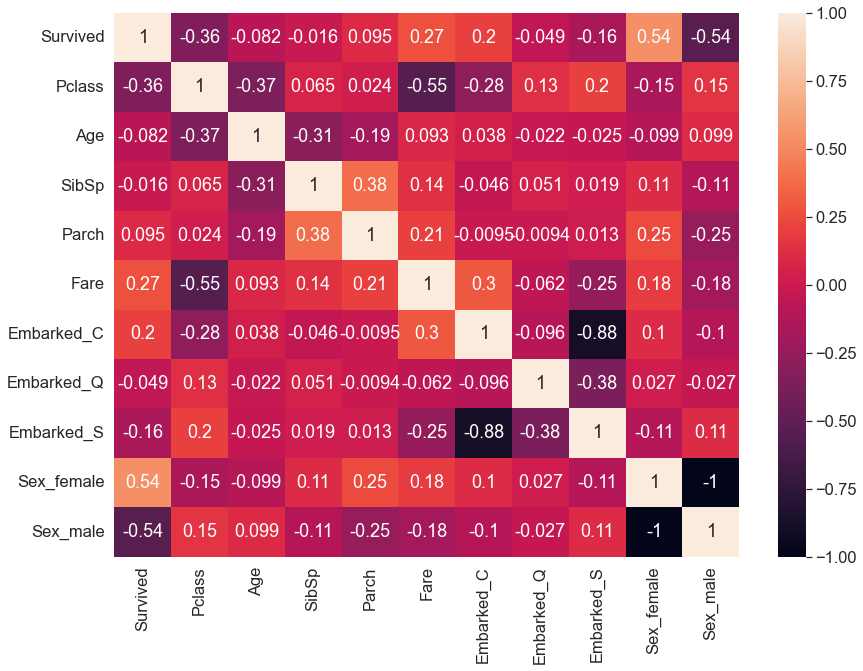

In [46]:
# Checking for independence between features
plt.figure(figsize=(14,10))
sns.heatmap(df_train_dummied.corr(),annot= True)  

In [41]:
used_features =[
    "Pclass",
    "Age",
    "SibSp",
    "Parch",
    "Sex_female",
    "Sex_male",
    "Embarked_C",
    "Embarked_Q",
    "Embarked_S"
]

X = df_train_dummied[used_features].values
print(type(X))
y = df_train_dummied['Survived']
type(y)

NameError: name 'df_train_dummied' is not defined

In [37]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [47]:
from sklearn.model_selection import 

SyntaxError: invalid syntax (Temp/ipykernel_4620/2198986588.py, line 1)

In [38]:
from sklearn.model_selection import train_test_split
# Split dataset in training and test datasets
# X_train, X_test = train_test_split(df_train, test_size=0.5, random_state=int(time.time()))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)


In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [1]:

from sklearn.linear_model import LogisticRegression
# Instantiate the classifier
LogReg = LogisticRegression()


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [41]:
# Train classifier
LogReg.fit(X_train, y_train)

C:\Users\Amrita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred=LogReg.predict(X_test)

In [43]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [44]:
y_test

432    1
672    0
527    0
823    1
665    0
      ..
89     0
549    1
445    1
241    1
458    1
Name: Survived, Length: 267, dtype: int64

In [2]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [46]:
metrics.confusion_matrix(y_test, y_pred)

array([[142,  19],
       [ 23,  83]], dtype=int64)

In [47]:
metrics.accuracy_score(y_test, y_pred)

0.8426966292134831

In [48]:
len(X_test)

267

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       161
           1       0.81      0.78      0.80       106

    accuracy                           0.84       267
   macro avg       0.84      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [50]:
LogReg.coef_

array([[-1.18165139, -0.03883665, -0.25384124, -0.14137883,  1.18584751,
        -1.18280255,  0.18769463,  0.13232546, -0.31697513]])

In [51]:
LogReg.intercept_

array([3.94132278])

In [52]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [53]:
LogReg.predict_proba(X_test)

array([[0.36310518, 0.63689482],
       [0.93341204, 0.06658796],
       [0.55600523, 0.44399477],
       [0.4811907 , 0.5188093 ],
       [0.84187063, 0.15812937],
       [0.84371664, 0.15628336],
       [0.56371223, 0.43628777],
       [0.13977149, 0.86022851],
       [0.06619106, 0.93380894],
       [0.8300791 , 0.1699209 ],
       [0.55652357, 0.44347643],
       [0.86310302, 0.13689698],
       [0.8300791 , 0.1699209 ],
       [0.15564181, 0.84435819],
       [0.23373124, 0.76626876],
       [0.85368978, 0.14631022],
       [0.86295216, 0.13704784],
       [0.576966  , 0.423034  ],
       [0.07254536, 0.92745464],
       [0.91263025, 0.08736975],
       [0.4094005 , 0.5905995 ],
       [0.63033454, 0.36966546],
       [0.8720245 , 0.1279755 ],
       [0.81048206, 0.18951794],
       [0.88447309, 0.11552691],
       [0.88921117, 0.11078883],
       [0.88447309, 0.11552691],
       [0.46664188, 0.53335812],
       [0.69317406, 0.30682594],
       [0.93399624, 0.06600376],
       [0.

# practice

In [25]:
location

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
df_train = location.drop(['PassengerId', 'Name', 'Ticket' ,'Cabin' ], axis= 1)

In [27]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [28]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [30]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [33]:
avg_df = df_train.groupby(['Pclass']).mean()

In [34]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return avg_df.loc[1,'Age']
        elif Pclass== 2:
            return df_train[df_train['Pclass']==2]['Age'].mean()
        else:
            return 24
    else:
        return Age
    

In [35]:
df_train['Age'] = df_train[['Age' , 'Pclass']].apply(age_approx, axis=1)

In [38]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [39]:
df_train_dummies = pd.get_dummies(df_train , columns=['Sex'])

In [40]:
df_train_dummies

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,1
887,1,1,19.0,0,0,30.0000,S,1,0
888,0,3,24.0,1,2,23.4500,S,1,0
889,1,1,26.0,0,0,30.0000,C,0,1


In [44]:
used_features =[
    "Pclass",
    "Age",
    "SibSp",
    "Parch",
    "Sex_female",
    "Sex_male"
]

X = df_train_dummies[used_features].values
print(type(X))
y = df_train_dummies['Survived']
type(y)

<class 'numpy.ndarray'>


pandas.core.series.Series

In [45]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
# Split dataset in training and test datasets
# X_train, X_test = train_test_split(df_train, test_size=0.5, random_state=int(time.time()))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 6)
(268, 6)
(623,)
(268,)


In [50]:

from sklearn.linear_model import LogisticRegression
# Instantiate the classifier
LogReg = LogisticRegression()

In [51]:
LogReg.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred=LogReg.predict(X_test)

In [53]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0], dtype=int64)

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
from sklearn import metrics
metrics.confusion_matrix(y_test , y_pred)

array([[160,  16],
       [ 22,  70]], dtype=int64)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       176
           1       0.81      0.76      0.79        92

    accuracy                           0.86       268
   macro avg       0.85      0.83      0.84       268
weighted avg       0.86      0.86      0.86       268

